# Produto Mínimo Viável MVP

## Importando Fontes de Dados Bairros com Coordenadas Mapa


In [5]:
import geopandas as gpd

caminho_arquivo = r"C:\Users\devma\Projetos\projeto_sesc\fonte-de-dados\PA_bairros_CD2022 (2).gpkg"

df_bairros_maps = gpd.read_file(caminho_arquivo)

df_bairros_maps


,CD_REGIAO,NM_REGIAO,CD_UF,NM_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,CD_SUBDIST,NM_SUBDIST,...,NM_CONCURB,AREA_KM2,v0001,v0002,v0003,v0004,v0005,v0006,v0007,geometry
0,1,Norte,15,Pará,1500107,Abaetetuba,150010705,Abaetetuba,15001070500,None,...,Abaetetuba,1.029060,8555,3032,3025,7,3.5,0.0538,2474,"POLYGON ((-48.88272 -1.72217, -48.88194 -1.722..."
1,1,Norte,15,Pará,1500107,Abaetetuba,150010705,Abaetetuba,15001070500,None,...,Abaetetuba,0.320866,3702,1296,1296,0,3.5,0.024,1043,"POLYGON ((-48.88825 -1.72101, -48.88925 -1.720..."
2,1,Norte,15,Pará,1500107,Abaetetuba,150010705,Abaetetuba,15001070500,None,...,Abaetetuba,0.937409,10583,3666,3665,1,3.4,0.0308,3149,"POLYGON ((-48.88395 -1.72192, -48.88565 -1.721..."
3,1,Norte,15,Pará,1500107,Abaetetuba,150010705,Abaetetuba,15001070500,None,...,Abaetetuba,0.598494,6123,1939,1937,2,3.6,0.0432,1691,"POLYGON ((-48.87573 -1.72031, -48.87568 -1.720..."
4,1,Norte,15,Pará,1500107,Abaetetuba,150010705,Abaetetuba,15001070500,None,...,Abaetetuba,0.514938,3882,1321,1297,24,3.5,0.0326,1104,"POLYGON ((-48.88266 -1.72788, -48.88229 -1.727..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,1,Norte,15,Pará,1507979,Terra Santa,150797905,Terra Santa,15079790500,None,...,None,0.424558,2059,620,616,4,3.9,0.0076,527,"POLYGON ((-56.48968 -2.10178, -56.48987 -2.101..."
378,1,Norte,15,Pará,1508001,Tomé-Açu,150800105,Tomé-Açu,15080010500,None,...,None,0.350409,960,402,396,6,3,0.0033,300,"POLYGON ((-48.15408 -2.4209, -48.15409 -2.4208..."
379,1,Norte,15,Pará,1508001,Tomé-Açu,150800105,Tomé-Açu,15080010500,None,...,None,0.217775,540,215,208,7,3,0.0169,178,"POLYGON ((-48.14453 -2.42085, -48.14452 -2.420..."
380,1,Norte,15,Pará,1508001,Tomé-Açu,150800105,Tomé-Açu,15080010500,None,...,None,0.217775,540,215,208,7,3,0.0169,178,"POLYGON ((-48.14464 -2.41805, -48.14656 -2.418..."


## Iniciando Normalização da Base de Bases

In [6]:
df_bairros_maps.columns

Index(['CD_REGIAO', 'NM_REGIAO', 'CD_UF', 'NM_UF', 'CD_MUN', 'NM_MUN',
       'CD_DIST', 'NM_DIST', 'CD_SUBDIST', 'NM_SUBDIST', 'CD_BAIRRO',
       'NM_BAIRRO', 'CD_RGINT', 'NM_RGINT', 'CD_RGI', 'NM_RGI', 'CD_CONCURB',
       'NM_CONCURB', 'AREA_KM2', 'v0001', 'v0002', 'v0003', 'v0004', 'v0005',
       'v0006', 'v0007', 'geometry'],
      dtype='object')

In [ ]:
# Dicionário de mapeamento para os novos nomes
novos_nomes = {
    'v0001': 'Total de pessoas',
    'v0002': 'Total de Domicílios',
    'v0003': 'Total de Domicílios Particulares',
    'v0004': 'Total de Domicílios Coletivos',
    'v0005': 'Média de moradores em Domicílios Particulares Ocupados',
    'v0006': 'Percentual de Domicílios Particulares Ocupados Imputados',
    'v0007': 'Total de Domicílios Particulares Ocupados'
}

# Renomeando as colunas no DataFrame
df_bairros_maps = df_bairros_maps.rename(columns=novos_nomes)

print(df_bairros_maps.columns)

Index(['CD_REGIAO', 'NM_REGIAO', 'CD_UF', 'NM_UF', 'CD_MUN', 'NM_MUN',
       'CD_DIST', 'NM_DIST', 'CD_SUBDIST', 'NM_SUBDIST', 'CD_BAIRRO',
       'NM_BAIRRO', 'CD_RGINT', 'NM_RGINT', 'CD_RGI', 'NM_RGI', 'CD_CONCURB',
       'NM_CONCURB', 'AREA_KM2', 'Total de pessoas', 'Total de Domicílios',
       'Total de Domicílios Particulares', 'Total de Domicílios Coletivos',
       'Média de moradores em Domicílios Particulares Ocupados',
       'Percentual de Domicílios Particulares Ocupados Imputados',
       'Total de Domicílios Particulares Ocupados', 'geometry'],
      dtype='object')


## Trazendo os Bairros de Belém

In [8]:
# Filtrando o DataFrame para conter apenas linhas de Belém
df_bairros_maps = df_bairros_maps[df_bairros_maps['NM_MUN'] == 'Belém']

# Verificando a quantidade de linhas após o filtro
print(f"Total de registros para Belém: {len(df_bairros_maps)}")

# Visualizando as primeiras linhas para confirmar
df_bairros_maps.head()

Total de registros para Belém: 72


,CD_REGIAO,NM_REGIAO,CD_UF,NM_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,CD_SUBDIST,NM_SUBDIST,...,NM_CONCURB,AREA_KM2,Total de pessoas,Total de Domicílios,Total de Domicílios Particulares,Total de Domicílios Coletivos,Média de moradores em Domicílios Particulares Ocupados,Percentual de Domicílios Particulares Ocupados Imputados,Total de Domicílios Particulares Ocupados,geometry
36,1,Norte,15,Pará,1501402,Belém,150140205,Belém,15014020500,None,...,Belém/PA,1.423776,18335,7741,7734,7,2.8,0.1573,6553,"POLYGON ((-48.4884 -1.46606, -48.48916 -1.4654..."
37,1,Norte,15,Pará,1501402,Belém,150140255,Guamá,15014025500,None,...,Belém/PA,0.797490,11923,4752,4748,4,3,0.0411,3943,"POLYGON ((-48.46081 -1.45554, -48.46211 -1.455..."
38,1,Norte,15,Pará,1501402,Belém,150140205,Belém,15014020500,None,...,Belém/PA,1.472806,10455,4122,4092,30,3.1,0.0615,3315,"POLYGON ((-48.49981 -1.46633, -48.5003 -1.4667..."
39,1,Norte,15,Pará,1501402,Belém,150140255,Guamá,15014025500,None,...,Belém/PA,1.820711,34605,12711,12707,4,3.2,0.0402,10708,"POLYGON ((-48.47509 -1.46769, -48.47406 -1.467..."
40,1,Norte,15,Pará,1501402,Belém,150140205,Belém,15014020500,None,...,Belém/PA,1.472307,28604,10900,10897,3,3,0.0406,9425,"POLYGON ((-48.47846 -1.46641, -48.47857 -1.466..."


In [11]:
import pandas as pd 
df_renda_bairros = pd.read_excel(r"C:\Users\devma\Projetos\projeto_sesc\fonte-de-dados\Agregados_por_bairros_renda_responsavel_BR.xlsx")

df_renda_bairros

,CD_BAIRRO,NM_BAIRRO,V06001,V06002,V06003,V06004,V06005
0,1100015001,Centro,480,1208,1.43,4053.67,52524924.01
1,1100015002,Liberdade,391,1029,1.43,2630.28,7175909.91
2,1100015003,Cidade Alta,498,1286,1.53,2347.26,1981893.18
3,1100015005,Princesa Isabel,1059,2844,1.82,1772.79,1616198.15
4,1100015006,Redondo,871,2360,1.57,2619.09,13133894.16
...,...,...,...,...,...,...,...
17373,5218300009,Setor Mãe Bela,1025,3045,2.16,2147.09,2946872.82
17374,5218300010,Setor Buenos Aires,2901,9248,2.09,2636.50,13790179.99
17375,5218300011,Cafelândios,204,598,1.54,2591.97,5006438.85
17376,5218300012,Vale do Amanhecer,292,902,2.73,1510.20,749051.03


## Inciando o Cruzamento de Informações 

In [14]:
df_bairros_maps.columns

Index(['CD_REGIAO', 'NM_REGIAO', 'CD_UF', 'NM_UF', 'CD_MUN', 'NM_MUN',
       'CD_DIST', 'NM_DIST', 'CD_SUBDIST', 'NM_SUBDIST', 'CD_BAIRRO',
       'NM_BAIRRO', 'CD_RGINT', 'NM_RGINT', 'CD_RGI', 'NM_RGI', 'CD_CONCURB',
       'NM_CONCURB', 'AREA_KM2', 'Total de pessoas', 'Total de Domicílios',
       'Total de Domicílios Particulares', 'Total de Domicílios Coletivos',
       'Média de moradores em Domicílios Particulares Ocupados',
       'Percentual de Domicílios Particulares Ocupados Imputados',
       'Total de Domicílios Particulares Ocupados', 'geometry'],
      dtype='object')

In [15]:
df_renda_bairros.columns

Index(['CD_BAIRRO', 'NM_BAIRRO', 'V06001', 'V06002', 'V06003', 'V06004',
       'V06005'],
      dtype='object')

In [17]:
# Padronizando a chave como texto nos dois DataFrames
df_bairros_maps['CD_BAIRRO'] = df_bairros_maps['CD_BAIRRO'].astype(str)
df_renda_bairros['CD_BAIRRO'] = df_renda_bairros['CD_BAIRRO'].astype(str)


In [18]:
df_bairros_completo = df_bairros_maps.merge(
    df_renda_bairros[['CD_BAIRRO', 'V06001', 'V06002', 'V06003', 'V06004', 'V06005']],
    on='CD_BAIRRO',
    how='left'
)


In [20]:
df_bairros_completo[['CD_BAIRRO']].isna().sum()


CD_BAIRRO    0
dtype: int64

In [19]:
df_bairros_completo

,CD_REGIAO,NM_REGIAO,CD_UF,NM_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,CD_SUBDIST,NM_SUBDIST,...,Total de Domicílios Coletivos,Média de moradores em Domicílios Particulares Ocupados,Percentual de Domicílios Particulares Ocupados Imputados,Total de Domicílios Particulares Ocupados,geometry,V06001,V06002,V06003,V06004,V06005
0,1,Norte,15,Pará,1501402,Belém,150140205,Belém,15014020500,None,...,7,2.8,0.1573,6553,"POLYGON ((-48.4884 -1.46606, -48.48916 -1.4654...",6551,18321,1.97,9423.35,92407694.09
1,1,Norte,15,Pará,1501402,Belém,150140255,Guamá,15014025500,None,...,4,3,0.0411,3943,"POLYGON ((-48.46081 -1.45554, -48.46211 -1.455...",3942,11918,2.68,2763.49,10681250.35
2,1,Norte,15,Pará,1501402,Belém,150140205,Belém,15014020500,None,...,30,3.1,0.0615,3315,"POLYGON ((-48.49981 -1.46633, -48.5003 -1.4667...",3308,10389,2.95,4379.81,25394617.89
3,1,Norte,15,Pará,1501402,Belém,150140255,Guamá,15014025500,None,...,4,3.2,0.0402,10708,"POLYGON ((-48.47509 -1.46769, -48.47406 -1.467...",10705,34589,3.55,1724.97,3763169.19
4,1,Norte,15,Pará,1501402,Belém,150140205,Belém,15014020500,None,...,3,3,0.0406,9425,"POLYGON ((-48.47846 -1.46641, -48.47857 -1.466...",9418,28578,2.86,4343.32,42142296.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1,Norte,15,Pará,1501402,Belém,150140265,Mosqueiro,15014026500,None,...,0,2.9,0.0166,421,"POLYGON ((-48.38303 -1.11083, -48.38293 -1.112...",421,1226,2.98,1276.26,2212434.14
68,1,Norte,15,Pará,1501402,Belém,150140265,Mosqueiro,15014026500,None,...,8,3.5,0,36,"POLYGON ((-48.40276 -1.08224, -48.40295 -1.081...",36,125,2.37,2650.89,12004640.56
69,1,Norte,15,Pará,1501402,Belém,150140265,Mosqueiro,15014026500,None,...,0,2.8,0,152,"POLYGON ((-48.37873 -1.0651, -48.37802 -1.0645...",151,414,2.06,2163.66,15022440.73
70,1,Norte,15,Pará,1501402,Belém,150140265,Mosqueiro,15014026500,None,...,0,3.3,0.011,913,"POLYGON ((-48.36999 -1.05073, -48.37 -1.05022,...",910,2990,3.05,1380.58,1776948.03


## Normalizando Colunas do df_bairroas_completo 

In [21]:
df_bairros_completo.columns

Index(['CD_REGIAO', 'NM_REGIAO', 'CD_UF', 'NM_UF', 'CD_MUN', 'NM_MUN',
       'CD_DIST', 'NM_DIST', 'CD_SUBDIST', 'NM_SUBDIST', 'CD_BAIRRO',
       'NM_BAIRRO', 'CD_RGINT', 'NM_RGINT', 'CD_RGI', 'NM_RGI', 'CD_CONCURB',
       'NM_CONCURB', 'AREA_KM2', 'Total de pessoas', 'Total de Domicílios',
       'Total de Domicílios Particulares', 'Total de Domicílios Coletivos',
       'Média de moradores em Domicílios Particulares Ocupados',
       'Percentual de Domicílios Particulares Ocupados Imputados',
       'Total de Domicílios Particulares Ocupados', 'geometry', 'V06001',
       'V06002', 'V06003', 'V06004', 'V06005'],
      dtype='object')

In [22]:
# Dicionário de mapeamento para os novos nomes
novos_nomes = {
    'V06001': 'Pessoas responsáveis em domicílios particulares permanentes ocupados',
    'V06002': 'Moradores em domicílios particulares permanentes ocupados',
    'V06003': 'Variância do número de moradores em domicílios particulares permanentes ocupados',
    'V06004': 'Valor do rendimento nominal médio mensal das pessoas responsáveis com rendimentos por domicílios particulares permanentes ocupados',
    'V06005': 'Variância do rendimento nominal mensal das pessoas responsáveis com rendimentos por domicílios particulares permanentes ocupados'
}

# Renomeando as colunas no DataFrame
df_bairros_completo = df_bairros_completo.rename(columns=novos_nomes)

print(df_bairros_completo.columns)

Index(['CD_REGIAO', 'NM_REGIAO', 'CD_UF', 'NM_UF', 'CD_MUN', 'NM_MUN',
       'CD_DIST', 'NM_DIST', 'CD_SUBDIST', 'NM_SUBDIST', 'CD_BAIRRO',
       'NM_BAIRRO', 'CD_RGINT', 'NM_RGINT', 'CD_RGI', 'NM_RGI', 'CD_CONCURB',
       'NM_CONCURB', 'AREA_KM2', 'Total de pessoas', 'Total de Domicílios',
       'Total de Domicílios Particulares', 'Total de Domicílios Coletivos',
       'Média de moradores em Domicílios Particulares Ocupados',
       'Percentual de Domicílios Particulares Ocupados Imputados',
       'Total de Domicílios Particulares Ocupados', 'geometry',
       'Pessoas responsáveis em domicílios particulares permanentes ocupados',
       'Moradores em domicílios particulares permanentes ocupados',
       'Variância do número de moradores em domicílios particulares permanentes ocupados',
       'Valor do rendimento nominal médio mensal das pessoas responsáveis com rendimentos por domicílios particulares permanentes ocupados',
       'Variância do rendimento nominal mensal das pes

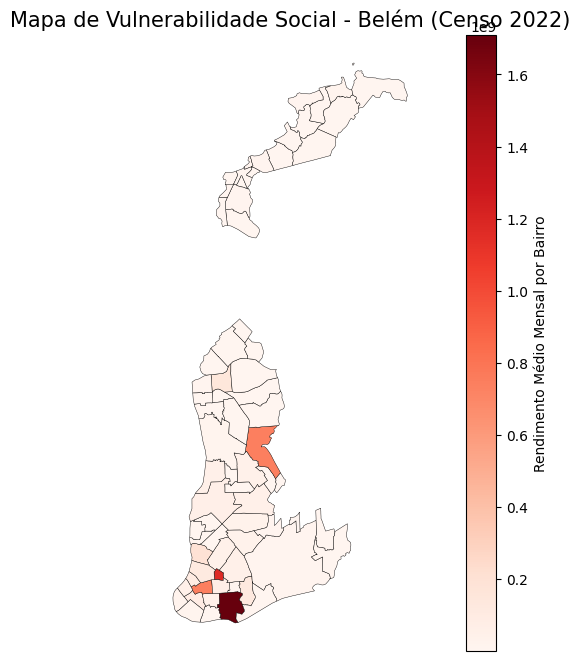

In [29]:
import matplotlib.pyplot as plt

# Criando a visualização
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plotando o mapa de Belém baseado na Renda Média (ex-V06004)
# Se você ainda não renomeou, troque 'V06004' pelo nome que estiver no seu DF
df_bairros_completo.plot(
    column='Variância do rendimento nominal mensal das pessoas responsáveis com rendimentos por domicílios particulares permanentes ocupados', 
    cmap='Reds',      # Cores vermelhas (quanto mais escuro, maior a renda/indicador)
    legend=True, 
    legend_kwds={'label': "Rendimento Médio Mensal por Bairro"},
    edgecolor='black', # Linha de contorno dos bairros
    linewidth=0.3,
    ax=ax
)

ax.set_title('Mapa de Vulnerabilidade Social - Belém (Censo 2022)', fontsize=15)
ax.set_axis_off() # Remove as coordenadas dos eixos para focar no mapa

plt.show()

In [30]:
df_bairros_completo.to_excel("df_bairros_belem.xlsx", index=False)
